[Back to course overview](../CourseOverviewR.ipynb)

# Functions in R
* Author: Johannes Maucher
* Last Update: 2017-03-13


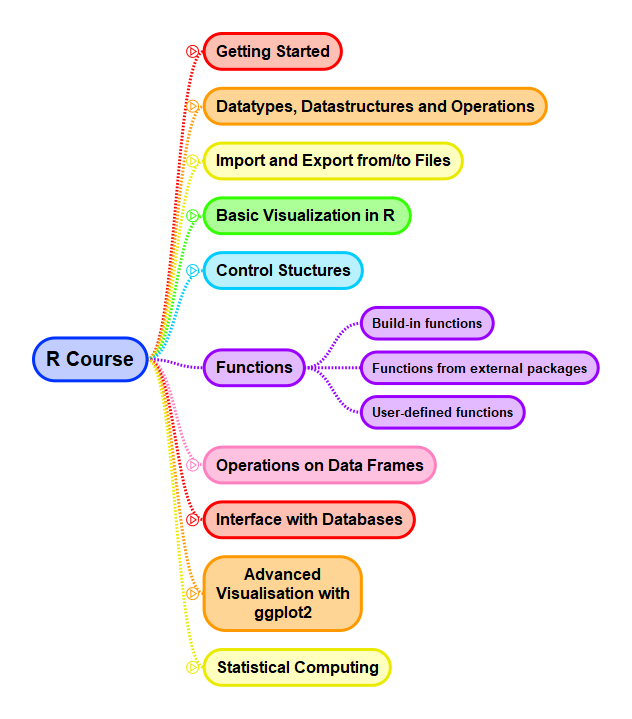

In [1]:
library("IRdisplay")
display_png(file="../../../Pics/DSRfunctions.PNG",width=900) 

R is primarily a functional language. Functions are treated as other data types. For example functions can be assigned to variables and can be passed as arguments to other functions. Even simple operators as *+* are functions. The conventional formulation *x+y* is just a shortcut for "+"(x,y):

In [3]:
9+6
"+"(9,6)

[1] 15

[1] 15

One of the most popular concepts of R functions is that they can be applied in a *vectorized* manner. This means that they can be executed for an individual element as well as elementwise for a collection of elements, e.g. vectors or matrices:

In [6]:
a<-1:10
b<-11:20
"+"(a,b)
a+b

[1] 12 14 16 18 20 22 24 26 28 30

[1] 12 14 16 18 20 22 24 26 28 30

In other programming languages such operations are typically defined only for single elements and an elementwise calculation on vectors is usually implemented by a repeated call of the operation within a for-loop. 

## Build-in functions
R provides an immense bunch of built-in-functions. These are functions, which are available in the basic R-package. They can be applied whenever needed and need not be explicitely loaded. 

### Examples for mathematical build-in functions
Some basic statistics, such as maximum, minimum, mean, standard-deviation and variance can be calculated by the following built-in-functions:

In [7]:
max(a)
min(a)
mean(a)
sd(a)
var(a)

[1] 10

[1] 1

[1] 5.5

[1] 3.02765

[1] 9.166667

Some other mathematical built-in functions are:

In [8]:
sqrt(25)
cos(pi)
seq(1,100,by=20)

[1] 5

[1] -1

[1]  1 21 41 61 81

### Examples for built-in character functions
Character functions are executed on textual data. A small but important subset of character built-in functions is:

* `nchar(x)`: Returns the number of characters in *x*,
* `substr(x,u,v)`: Returns the substring of *x*, which starts at index *u* and terminates at index *v*,
* `strsplit(x,split,fixed=FALSE)`: Splits the character-variable *x* at all characters defined in the pattern *split*. If *fixed=TRUE*, then the pattern *split* is interpreted as a character variable. If *fixed=FALSE*, the *split* is interpreted as a regular expression,
* `grep(pattern,x,ignore.case=FALSE,fixed=TRUE)`: Searches for *pattern* in *x*. If *fixed=FALSE*, then pattern is a regular expression. If *fixed=TRUE*, then *pattern* is a text string. Returns the matching indices,
* `sub(pattern, replacement, x, ignore.case=FALSE, fixed=FALSE)`: Finds pattern in *x* and substitutes the *replacement* text. If *fixed=FALSE*, then *pattern* is a regular expression. If *fixed=TRUE*, then *pattern* is a text string. Note that`sub()` replaces only the first occurence of *pattern*. If all occurences shall be replaced `gsub()` can be applied.
* `paste(A,sep="")`: Concatenates the strings in *A* (sequence of strings) after using the *sep* string to separate them,
* `toupper(x)`: Turns all characters in *x* to uppercase,
* `tolower(x)`: Turns all characters in *x* to lowercase.

These functions are demonstrated in the following lines of codes:

In [10]:
myCharVar="Das ist ein einfacher Satz. Und hier kommt nochmal ein Satz."
nchar(myCharVar)
substr(myCharVar,5,8)
strsplit(myCharVar,'.',fixed=TRUE)
strsplit(myCharVar,'\\s') #split at all whitespaces

[1] 60

[1] "ist "

[[1]]
[1] "Das ist ein einfacher Satz"       " Und hier kommt nochmal ein Satz"

[[1]]
 [1] "Das"       "ist"       "ein"       "einfacher" "Satz."     "Und"      
 [7] "hier"      "kommt"     "nochmal"   "ein"       "Satz."

In [12]:
seqChars=c("Das ist Satz 1.","Hier ist der zweite Satz.","Und hier der dritte.") #vector of character-strings
grep('der',seqChars,fixed=TRUE)
grep('\\si',seqChars,fixed=FALSE)
grep('\\d',seqChars,fixed=FALSE)
sub('zweite','2.',seqChars,fixed=TRUE)
paste("Feature",1:5,sep="-")

[1] 2 3

[1] 1 2

[1] 1

[1] "Das ist Satz 1."       "Hier ist der 2. Satz." "Und hier der dritte."

[1] "Feature-1" "Feature-2" "Feature-3" "Feature-4" "Feature-5"

In [13]:
curval=10
paste("The value is",curval,sep=": ")
paste("Today is",date(),sep=": ")
toupper('abCD')
tolower('EFgh')

[1] "The value is: 10"

[1] "Today is: Mon Oct 02 08:48:11 2017"

[1] "ABCD"

[1] "efgh"

### Examples for built-in Date functions
Dates and times are often represented as character variables. However, in this representation date-time-calculations, such as the determination of the number of days inbetween two given dates, are not possible. Date-time calculations can easily be performed if the character representation of a date is transformed to an R-date-object by the built-in-function `as.Date`:

In [20]:
(day1<-as.Date("2015-09-08"))
(day2<-as.Date("25.07.2016",format="%d.%m.%Y"))
(day3<-as.Date('November 7, 2017',format='%B %d, %Y'))

[1] "2015-09-08"

[1] "2016-07-25"

[1] "2017-11-07"

In [19]:
day2-day1 #number of days between the two dates

Time difference of 321 days

In [22]:
mydays<-c(day1,day2,day3)
weekdays(mydays)

[1] "Dienstag" "Montag"   "Dienstag"

Much more built-in functions for date- and time processing are described e.g. in [https://www.stat.berkeley.edu/~s133/dates.html](https://www.stat.berkeley.edu/~s133/dates.html).

### Examples for other useful built-in functions
Besides a vast variety of mathematical functions, there are a lot other useful build-in functions in R. Here is just a small subset of such useful helpers:

* `length(x)`: Returns the length of an object *x*. E.g. *length(c(4,2,19))* returns 3.
* `seq(x,y,z)`: Generates a sequence of numbers from *x* to *y* with a step-size of *z*.
* `rep(x,n)`: Generates a sequence, which contains *n* copies of *x* (x need not be a number, but can also be e.g. a sequence).
* `cut(x,n)`: Divides the continuous variable *x* into a vector with *n* levels.
* `pretty(x,n)`: Divides a continuous variable *x* into *n* intervals by selecting *n+1* equally spaced rounded values.
* `cat(A)`: Concatenates objects in A.

**Examples:**

In [23]:
x<-seq(13,40,5)
x
y<-rep(x,2)
y
length(x)
length(y)

[1] 13 18 23 28 33 38

[1] 13 18 23 28 33 38 13 18 23 28 33 38

[1] 6

[1] 12

In [27]:
cut(c(8,4,16),3)
x2<-c(45,2,82,22,4)
x2
cut(x2,4)

[1] (3.99,8] (3.99,8] (12,16] 
Levels: (3.99,8] (8,12] (12,16]

[1] 45  2 82 22  4

[1] (42,62]   (1.92,22] (62,82.1] (1.92,22] (1.92,22]
Levels: (1.92,22] (22,42] (42,62] (62,82.1]

In [28]:
x
pretty(x,5)

[1] 13 18 23 28 33 38

[1] 10 15 20 25 30 35 40

In [29]:
m=3
j=5
cat(" Value of m is:\t", m, "\n","Value of j is\t",j)

 Value of m is:	 3 
 Value of j is	 5

## Functions from external R packages
There exists more than 10000 R-packages, which provide solutions for all kinds of problems. External R packages can be downloaded e.g. from [https://cran.r-project.org/](https://cran.r-project.org/). The list of all installed package, available in your current environment, can be obtained by the following statement:

In [10]:
library()

Functions of external packages, which are installed in your environment must be loaded before they can be applied. Functions from package *X* can be loaded by
*library(X)*. For example the following statement loads the package *ggplot2*

In [11]:
library(ggplot2)

External packages, which are not already installed in your environment, can be downloaded and installed by

install.packages("NameOfPackage")

For example the following statement downloads and installs the package *ttseries*

In [12]:
install.packages("tagcloud")

ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


This command is only successful if the package exists on the configured CRAN-mirror. A list of all available CRAN-mirrors can be obtained by the *getCRANmirrors()*-function. A particular mirror can the be set by

*options(repos=structure(c(CRAN="http://cloud.r-project.org/")))*

Example:

In [13]:
getCRANmirrors(all = FALSE, local.only = FALSE)
options(repos=structure(c(CRAN="http://cloud.r-project.org/")))

,Name,Country,City,URL,Host,Maintainer,OK,CountryCode,Comment
1,0-Cloud [https],0-Cloud,0-Cloud,https://cloud.r-project.org/,"Automatic redirection to servers worldwide, currently sponsored by Rstudio",winston # stdout.org,1,us,secure_mirror_from_master
2,0-Cloud,0-Cloud,0-Cloud,http://cloud.r-project.org/,"Automatic redirection to servers worldwide, currently sponsored by Rstudio",winston # stdout.org,1,us,secure_mirror_from_master
3,Algeria [https],Algeria,Algiers,https://cran.usthb.dz/,University of Science and Technology Houari Boumediene,Boukala m c <mboukala # usthb.dz>,1,dz,secure_mirror_from_master
4,Algeria,Algeria,Algiers,http://cran.usthb.dz/,University of Science and Technology Houari Boumediene,Boukala m c <mboukala # usthb.dz>,1,dz,secure_mirror_from_master
5,Argentina (La Plata),Argentina,La Plata,http://mirror.fcaglp.unlp.edu.ar/CRAN/,Universidad Nacional de La Plata,esuarez # Fcaglp.unlp.edu.ar,1,ar,
6,Australia (Canberra) [https],Australia,Canberra,https://cran.csiro.au/,CSIRO,"Bill.Venables # CSIRO.au, ServiceDesk2 # CSIRO.au",1,au,secure_mirror_from_master
7,Australia (Canberra),Australia,Canberra,http://cran.csiro.au/,CSIRO,"Bill.Venables # CSIRO.au, ServiceDesk2 # CSIRO.au",1,au,secure_mirror_from_master
8,Australia (Melbourne 1) [https],Australia,Melbourne,https://mirror.aarnet.edu.au/pub/CRAN/,AARNET,<sysadmin # aarnet.edu.au>,1,au,secure_mirror_from_master
9,Australia (Melbourne 2) [https],Australia,Melbourne,https://cran.ms.unimelb.edu.au/,"School of Mathematics and Statistics, University of Melbourne",unix-ops # lists.unimelb.edu.au,1,au,secure_mirror_from_master
10,Australia (Perth) [https],Australia,Perth,https://cran.curtin.edu.au/,Curtin University of Technology,unix # curtin.edu.au,1,au,secure_mirror_from_master


> **Note:** The CRAN mirror for downloading R packages can be set in the current R script as shown above. However, a CRAN mirror can also be set permanently by inserting the line 
```options(repos=structure(c(CRAN="YOUR FAVORITE MIRROR")))```
into the *Rprofile* configuration file. This file can be found in the *library* of the directory, where R is installed. In my case it is located in `C:\Users\xxx\Anaconda2\envs\condatascience\R\library\base\R`. 

## User-defined functions

Users can define their own functions. The encapsulations of code in functions provides more structure, readability and maintainability. The most important advantage however is, that some routines, which are required not only once, need not be implemented repititevly. A function must be defined only once and can then be used wherever it is required.

The general syntax for functions in R is:

In [30]:
functionName<-function(listOfParameters){
 statements
 return (result)
}

The list of parameters within the brackets that follow the keyword *function* are the *arguments*, which are passed as input to the function. Within the function body (inside the curly brackets) arbitrarily complex statements are executed. The result of this computation is returned by the function. The defined function is assigned to a variable *functionName*. The function can be accessed via this variable-name as shown below.

For example in the following code-snippet a function is defined, which normalizes the values of the vector, which is passed as argument to the function. The normalized values of the passed vector is returned by the function.

In [31]:
myNormalizer<-function(rawdata){
    maximum<-max(rawdata)
    minimum<-min(rawdata)
    normeddata=(rawdata-minimum)/(maximum-minimum)
    return (normeddata)
}

Now, this function can be executed wherever it is required, by the name 

In [32]:
(a<-10:20)
A<-myNormalizer(a)
print(A)

[1] 10 11 12 13 14 15 16 17 18 19 20

 [1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0


In [33]:
(b<-c(33,34,20,52,60,71))
B<-myNormalizer(b)
print(B)

[1] 33 34 20 52 60 71

[1] 0.2549020 0.2745098 0.0000000 0.6274510 0.7843137 1.0000000


### Passing optional arguments to a function in the function
The function `myNormalizer()` shall now be extended such that it can also provide normalized values, which are rounded to a configurable number of digits. The standard R-function `round()` already has the parameter `digits`, which allows to set the number of digits after the decimal point. The `round()`-function shall now be applied in the new function `myRoundNormalizer()`. Hence, a value for the `digits` parameter of the `round()`-function must be passed to `myRoundNormalizer()`. Passing an arbitrary set of parameters to an inner function can be realized by the triple-dot-function: `...`. This is demonstrated in the following code cells. 

In [34]:
myRoundNormalizer<-function(rawdata,round=F,...){
    maximum<-max(rawdata)
    minimum<-min(rawdata)
    normeddata=(rawdata-minimum)/(maximum-minimum)
    if (!round){
        return (normeddata)
    }else{
        return (round(normeddata,...))
    }
}

In [36]:
B<-myRoundNormalizer(b)
print(B)
B<-myRoundNormalizer(b,round=T)
print(B)
B<-myRoundNormalizer(b,round=T,digits=2)
print(B)

[1] 0.2549020 0.2745098 0.0000000 0.6274510 0.7843137 1.0000000
[1] 0 0 0 1 1 1
[1] 0.25 0.27 0.00 0.63 0.78 1.00


## Efficient evaluation of functions: apply, lapply, sapply
In the case that there exists many sequences of numeric values (such as `a` and `b` above) and each sequence shall be normalized by the `myNormalizer`-function, one can just implement a loop, which envokes in each iteration the `myNormalizer`-function for an individual input-argument (sequence of numeric values). Such an implementation would work, but is not very efficient. It would be much more efficient to use the R built-in function `lapply(list of variables, functionName)`.

As shown in the following code-snippet no looping is required in this way:

In [38]:
(columnlist<-list(l1=a,l2=b))

$l1
 [1] 10 11 12 13 14 15 16 17 18 19 20

$l2
[1] 33 34 20 52 60 71

In [39]:
(columnlistNormed<-lapply(columnlist,myNormalizer))

$l1
 [1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

$l2
[1] 0.2549020 0.2745098 0.0000000 0.6274510 0.7843137 1.0000000

Note that the first parameter of the `lapply()`-function is a list, which contains the objects on which the function (`myNormalizer()` in the example above) shall be executed. In the case that an arbitrary function shall be executed not on a list of objects, but on an array or a matrix, the `apply()`-function can be used. This function has an additional parameter, which determines along which axes of the multidimensional object the function shall be applied. This is demonstrated in the example below. Here the `myNormalizer()`-function is first performed row-wise (parameter 1 in `apply()`) and then columnwise (parameter 2 in `apply()`).

In [41]:
(mymat<-matrix(floor(runif(28)*20),nrow=4,ncol=7))

1,1,6,3,18,0,10
6,16,7,8,14,17,7
13,17,11,9,7,5,12
9,19,19,8,14,0,7


Rowwise normalization:

In [43]:
(mymatNormed<-apply(mymat,1,myNormalizer))

0.05555556,0.00000000,0.6666667,0.4736842
0.05555556,0.90909091,1.0000000,1.0000000
0.33333333,0.09090909,0.5000000,1.0000000
0.16666667,0.18181818,0.3333333,0.4210526
1.00000000,0.72727273,0.1666667,0.7368421
0.00000000,1.00000000,0.0000000,0.0000000
0.55555556,0.09090909,0.5833333,0.3684211


Columnwise normalization:

In [44]:
(mymatNormed<-apply(mymat,2,myNormalizer))

0.0000000,0.0000000,0.00000000,0.0000000,1.0000000,0.0000000,0.6
0.4166667,0.8333333,0.07692308,0.8333333,0.6363636,1.0000000,0.0
1.0000000,0.8888889,0.38461538,1.0000000,0.0000000,0.2941176,1.0
0.6666667,1.0000000,1.00000000,0.8333333,0.6363636,0.0000000,0.0


*sapply()*-is similar to *lapply()*. However, it returns a vector or a matrix instead of a list: 

In [45]:
(columnmean<-lapply(columnlist,mean))
class(columnmean)

$l1
[1] 15

$l2
[1] 45

[1] "list"

In [46]:
(columnmean<-sapply(columnlist,mean))
class(columnmean)

l1 l2 
15 45

[1] "numeric"

## Exercises
[Exercise on functions in R](../../Assignments/Ass05FunctionsR.ipynb)